# Análisis exploratorio de los datos

El objetivo primario de este trabajo es llevar a cabo un análisis exploratorio de los datos contenidos en el archivo `pacientes_cancer.csv`. Para ello, será necesario realizar las siguientes tareas:

1. Entender qué representa cada variable y **eliminar las columnas innecesarias**.
2. **Distinguir entre columnas según el tipo** de variable (numérica, categórica, etc.)
3. Buscar **valores nulos** y **registros duplicados**.
4. Calcular **estadísticos descriptivos**:
    - Variables numéricas: *media*, *mediana*, *moda*, *cuartiles* y valores *máximo* y *mínimo*.
    - Variables categóricas: número de *categorías diferentes*, el valor de las *más y menos frecuentes*, y sus *frecuencias asociadas*.
5. Representar la **distribución** de los datos de la variable (*histograma*).
6. Estudiar la colinealidad entre variables e interpretarla.

In [1]:
# módulos básicos para análisis y visualización de datos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Cargar datos

En primer lugar, se cargan los datos y se leen utilizando el método `.head()` sobre el objeto que contiene le data frame para mostrar las primeras filas y así hacernos una idea de los datos que contiene el archivo.

In [2]:
df = pd.read_csv('cancer_gene_expression_dataset.csv') # leer dataset
df.head() # mostrar las primeras filas

,Patient_ID,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
0,P001,2.621229,2.294844,2.285151,3.162488,2.602772,2.000662,3.604151,3.030050,2.044993,...,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809,-0.881520
1,P002,2.644670,2.086924,2.105762,2.326020,3.698626,2.595286,1.770801,2.213316,3.052054,...,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557,-0.117294
2,P003,1.942043,1.781996,2.277527,1.855014,2.667775,3.023350,2.820747,2.580678,2.965334,...,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971,0.148492
3,P004,2.533690,2.987298,2.059414,2.213807,2.869632,2.081361,3.442306,3.219190,1.898180,...,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104,-0.571485
4,P005,2.380817,2.821170,3.066866,2.706125,2.098054,2.728489,2.752416,2.908399,2.782879,...,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727,0.202491


## Supresión de columnas innecesarias

Atendiendo al documento en el que se explican las diferentes variables, podemos prescindir de la columna `Patient_ID`, ya que no ofrece información relevante (ya viene dada por el índice). Por tanto, los datos con los que vamos a trabajar, que son todos *features* (recordemos que no hay etiquetas o variables objetivo) serán los demás:

In [3]:
X = df.drop(columns = ['Patient_ID']) # eliminar columna irrelevante
X.head()

,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
0,2.621229,2.294844,2.285151,3.162488,2.602772,2.000662,3.604151,3.030050,2.044993,2.728821,...,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809,-0.881520
1,2.644670,2.086924,2.105762,2.326020,3.698626,2.595286,1.770801,2.213316,3.052054,2.992125,...,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557,-0.117294
2,1.942043,1.781996,2.277527,1.855014,2.667775,3.023350,2.820747,2.580678,2.965334,2.406773,...,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971,0.148492
3,2.533690,2.987298,2.059414,2.213807,2.869632,2.081361,3.442306,3.219190,1.898180,2.915032,...,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104,-0.571485
4,2.380817,2.821170,3.066866,2.706125,2.098054,2.728489,2.752416,2.908399,2.782879,4.212290,...,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727,0.202491


## Estadísticos descriptivos 

Podemos obtener información general del dataset con el método `info()`:

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP53    100 non-null    float64
 1   BRCA1   100 non-null    float64
 2   BRCA2   100 non-null    float64
 3   EGFR    100 non-null    float64
 4   KRAS    100 non-null    float64
 5   MYC     100 non-null    float64
 6   PTEN    100 non-null    float64
 7   RB1     100 non-null    float64
 8   APC     100 non-null    float64
 9   VHL     100 non-null    float64
 10  CDKN2A  100 non-null    float64
 11  PIK3CA  100 non-null    float64
 12  BRAF    100 non-null    float64
 13  NRAS    100 non-null    float64
 14  ERBB2   100 non-null    float64
 15  ALK     100 non-null    float64
 16  RET     100 non-null    float64
 17  MET     100 non-null    float64
 18  FGFR1   100 non-null    float64
 19  FGFR2   100 non-null    float64
 20  CDK4    100 non-null    float64
 21  CDK6    100 non-null    float64
 22  CCN

Todas las variables son numéricas (cada una representa la expresión de un gen concreto) y no hay presencia de valores nulos, así que no es necesario limpiar ni formatear los datos.

Para obtener estadísticos descriptivos de las variables, podemos utilizar el método `describe()`:

In [5]:
X.describe() # números enteros y reales, respectivamente

,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.564368,0.621107,0.647325,0.651540,0.649910,0.609993,0.591527,0.654658,0.615342,0.768418,...,0.548199,0.614115,0.576009,0.486848,0.518716,0.527128,0.474388,0.490106,0.584352,0.546628
std,1.768274,1.774770,1.674977,1.741847,1.771320,1.665814,1.767049,1.842990,1.685256,1.781230,...,1.021494,1.139700,1.042993,0.994914,1.109193,1.096290,1.088611,1.175609,0.917804,1.092010
min,-2.847722,-2.807503,-2.567069,-2.332091,-2.177099,-2.608134,-2.579099,-3.070185,-2.687404,-2.213438,...,-0.937586,-1.460675,-1.033721,-0.782121,-1.264780,-1.123445,-1.348443,-1.495568,-0.776879,-0.928951
25%,-0.712626,-0.729151,-0.555345,-0.655722,-0.824549,-0.818286,-0.647376,-0.813309,-0.862052,-0.685428,...,-0.074217,-0.140486,-0.112279,-0.165772,-0.263892,-0.272676,-0.237959,-0.405425,-0.059142,-0.197554
50%,0.293465,0.402685,0.218273,0.179781,0.200899,0.321302,0.202253,0.179319,0.427116,0.306475,...,0.200861,0.276423,0.218374,0.140934,0.189176,0.218359,0.155563,0.106006,0.318130,0.165437
75%,2.297247,2.343236,2.271457,2.304849,2.515749,2.179464,2.384662,2.328705,2.202838,2.440812,...,0.882257,1.317875,1.083681,0.739940,1.050684,0.977860,0.931820,1.229496,0.945977,1.263827
max,3.800240,3.658024,3.635576,3.918180,4.144006,4.140825,3.604151,4.651548,3.500720,4.212290,...,2.998079,3.314082,3.033557,3.371548,3.258552,3.578233,3.253135,3.940957,3.139052,3.065894


## Distribución de los datos

Veamos la distribución de los datos. Por un lado, en forma de histogramas:

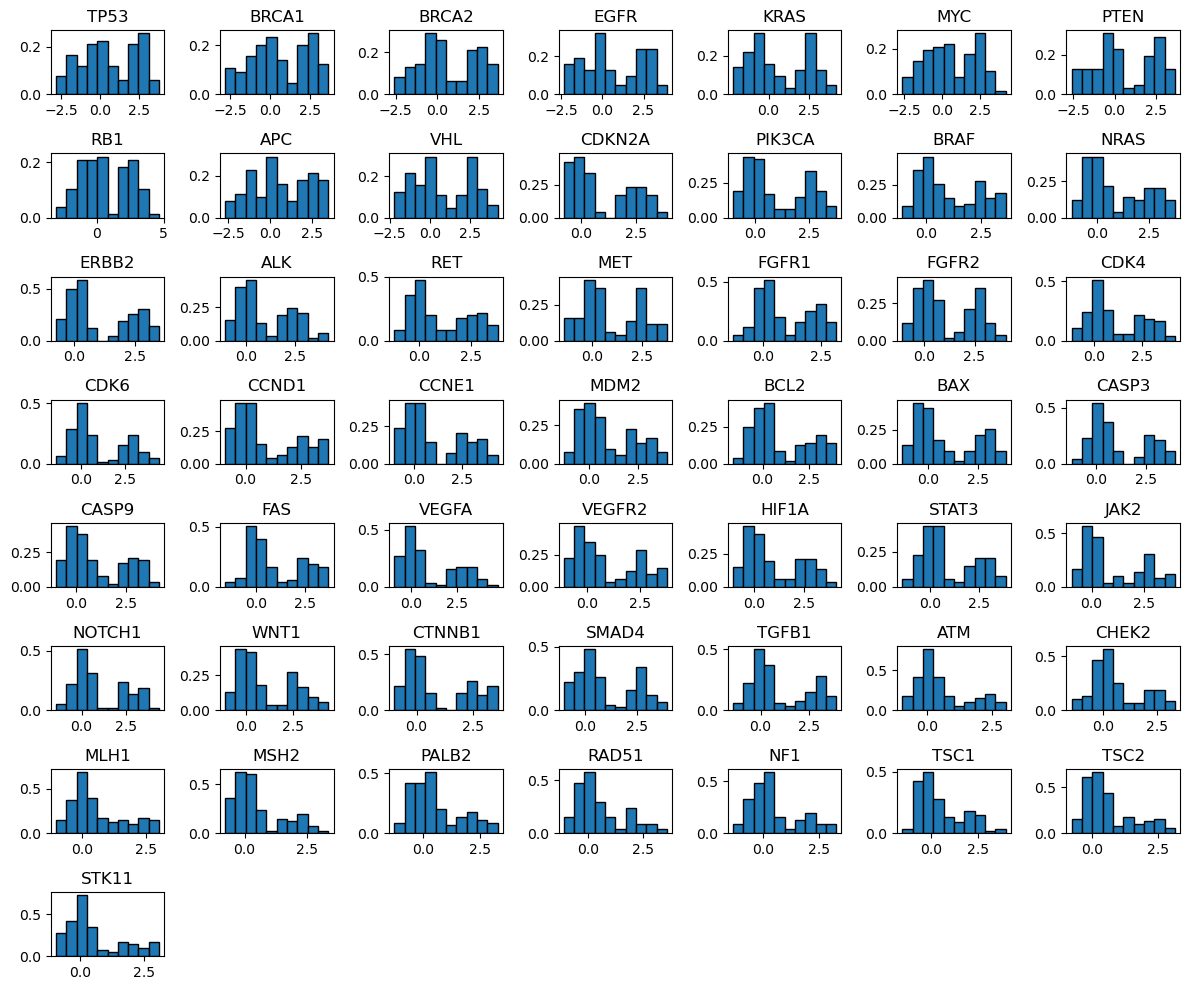

In [6]:
X.hist(edgecolor = "black", figsize=(12, 10), grid = False, density = True)
plt.tight_layout()
plt.show()

Se observa una distribución aproximadamente bimodal para todas las variables.

Por otro lado, los diagramas de cajas y bigotes:

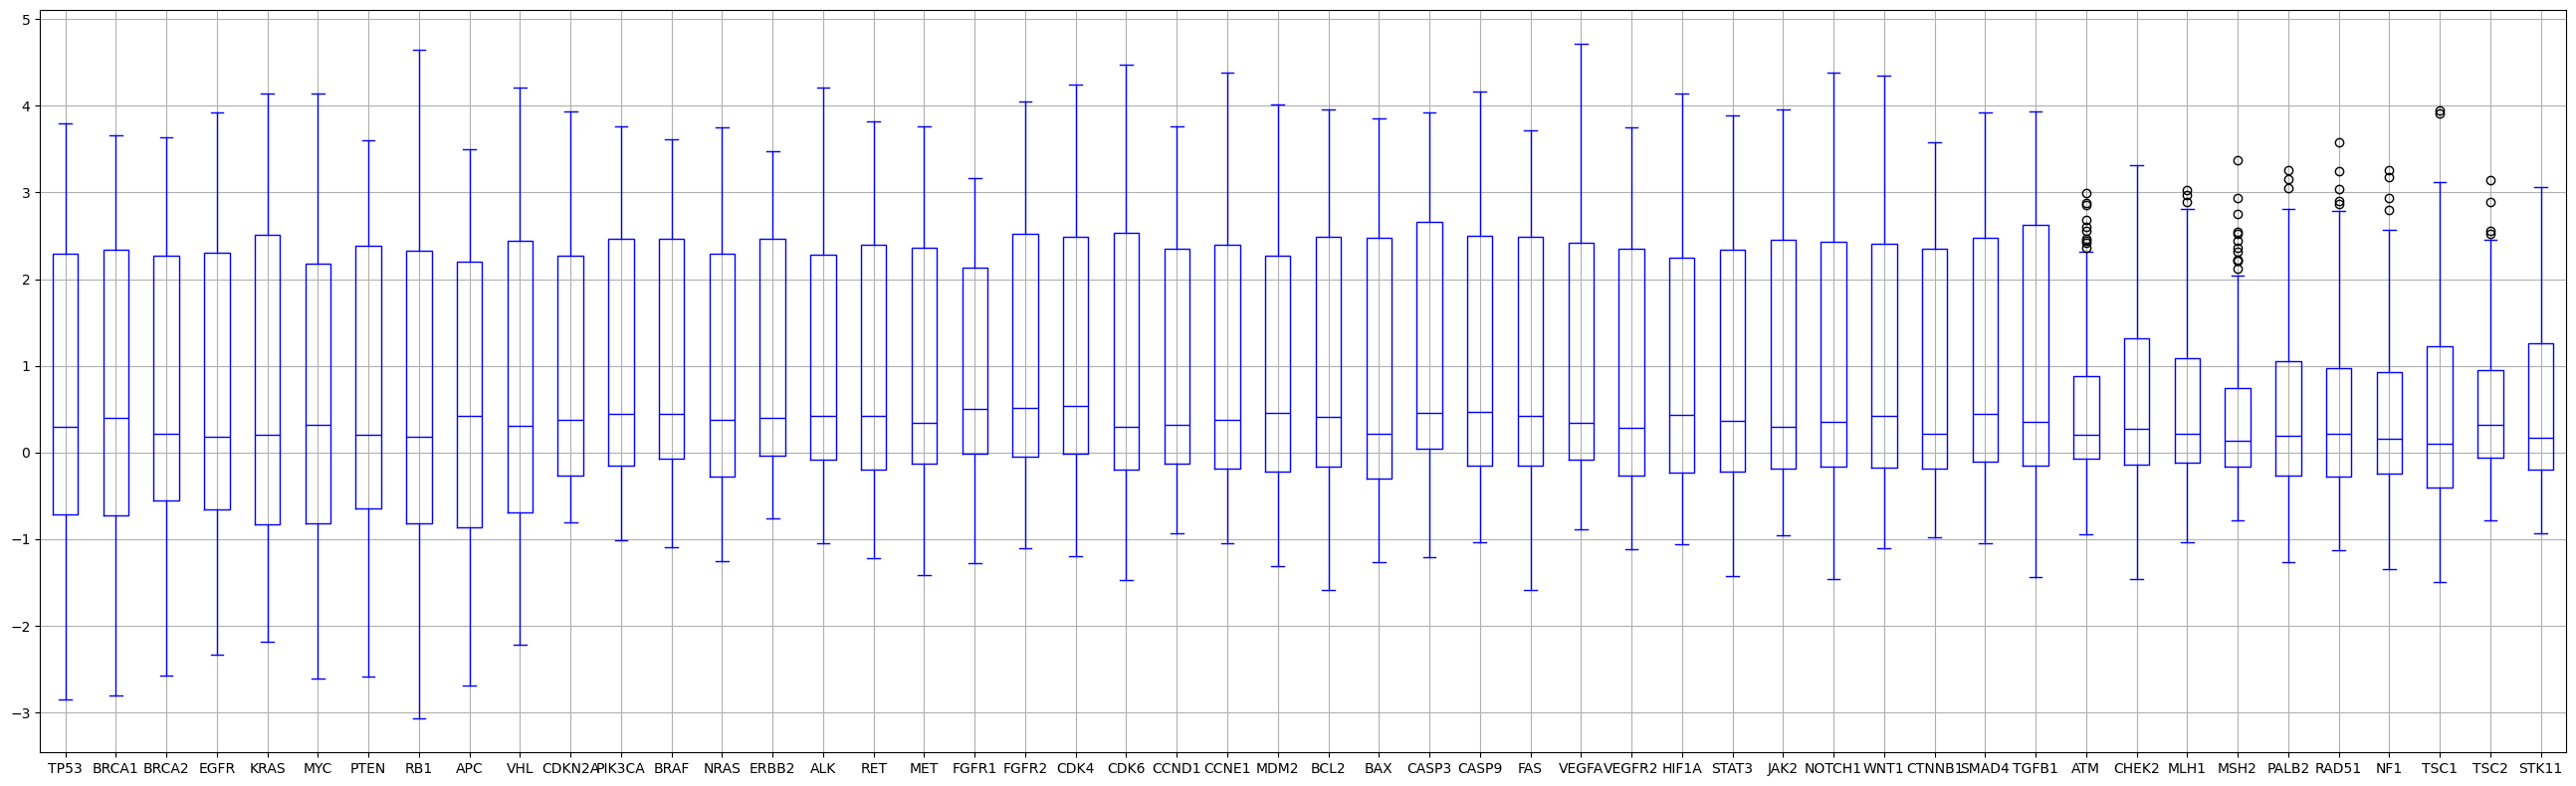

In [7]:
X.boxplot(color = "blue", figsize = (26, 8))
plt.tight_layout()
plt.show()

A partir de este diagrama podemos concluir que la distribución de los datos es muy similar para todas las variables, ya que se encuentran en un rango muy similar. Todas ellas son bastante homogéneas, aunque dicha homogeneidad parece romperse en las últimas variables. Además, contienen algunos outliers. Por ello, escalamos los datos de manera que los outliers afecten lo menos posible.

## Multicolinealidad

Para comprobar si hay genes correlacionados entre sí, podemos obtener la matriz de correlaciones, que calcula los coeficientes de correlación entre cada uno de las variables, y representarla visualmente con un mapa de calor.

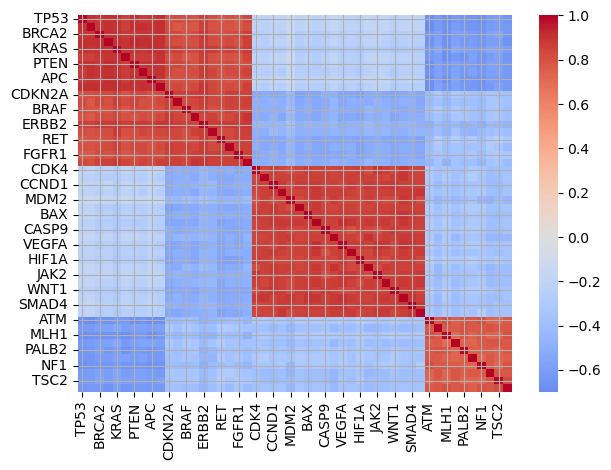

In [8]:
corr_matrix = X.corr()

sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            center=0, 
            annot=False)
plt.grid()
plt.tight_layout()
plt.show()

Atendiendo a este mapa de calor, podemos observar que los genes no son completamente independientes entre ellos: existe una fuerte correlación positiva para la expresión de muchos de ellos (color rojo sin tener en cuenta la diagonal) y una correlación negativa menos intensa para otros genes (color azul intenso). En este sentido, para hacer un clustering por características, convendría realizar un análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos perdiendo la menor cantidad de información posible. 

De todas maneras, para simplificar aún más los datos, vamos a cuantificar la colinearidad calculando el factor de inflación de la varianza (VIF) para cada uno de los genes. Consideraremos multicolineales a aquellos genes con $VIF \geq 10$.

In [9]:
X_vif = add_constant(X) # Añadimos constante para el cálculo de VIF

# Creamos un DataFrame para guardar los resultados
vif_data = pd.DataFrame()
vif_data["Gen"] = X_vif.columns # nombres de los genes

# Calculamos VIF para cada columna
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

# Filtramos y ordenamos para ver los genes con VIF alto
vif_multicol = vif_data[vif_data["VIF"] > 10].sort_values(by = "VIF", ascending = False)
vif_multicol

,Gen,VIF
0,const,157.965387
4,EGFR,24.779457
5,KRAS,22.995362
15,ERBB2,22.428425
10,VHL,20.138147
2,BRCA1,17.473239
9,APC,17.310145
40,TGFB1,17.269938
28,CASP3,17.108628
3,BRCA2,16.498028


Por tanto, como la información que aportan estos genes es redundante, podemos prescindir de ellos. De esta manera, se reduce la dimensionalidad de los datos de 50 variables a tan solo 10:

In [10]:
columnas_a_eliminar = vif_multicol["Gen"].tolist() # lista con el nombre de las columnas a eliminar
columnas_a_eliminar.remove('const') # sacamos el nombre de la constante para evitar errores
X_reducido = X.drop(columns = columnas_a_eliminar) # eliminamos las columnas
X_reducido.head()

,BRAF,BCL2,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2
0,2.623616,0.055461,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809
1,2.166133,0.410951,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557
2,2.632613,1.095228,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971
3,3.262156,0.413592,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104
4,2.559413,0.544475,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727


# IMPLEMENTACIÓN DEL MODELO CON DIMENSIONALIDAD REDUCIDA

Una vez reducida la dimensionalidad de los datos atendiendo al criterio del *VIF*, vamos a construir el modelo para agrupar según características. En primer lugar, escalamos los datos:

In [11]:
scaler = RobustScaler() # inicializamos el escalador robusto
X_scaled = scaler.fit_transform(X_reducido) # escalamos los datos

Con los datos escalados adecuadamente (todos tienen media $\mu = 0$ y desviación estándar $\sigma = 1$), podemos trabajar los algoritmos necesarios para hacer aprendizaje no supervisado.

## Clustering

Para estudiar si es mejor agrupar los datos en dos o tres clusters y estudiar el nivel de expresión génica correspondiente, necesitamos implementar un algoritmo de agrupamiento como `kmeans` y estudiar la inercia para cada número de clusters.

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is k

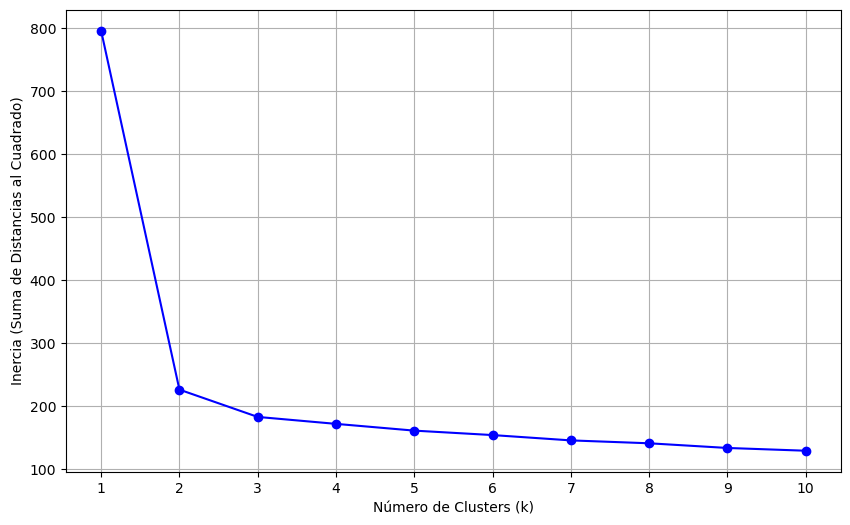

In [12]:
n_clusters_range = range(1, 11) # valores de k para evaluar
inertia_values = [] # inicailiza una lista para guardar los valores de inercia correspondientes a cada valor de k

for k in n_clusters_range:
    kmeans = KMeans(n_clusters = k, n_init = 10) # inicializa el algoritmo
    kmeans.fit(X_scaled) # ajusta los datos al modelo
    inertia_values.append(kmeans.inertia_) # guarda el valor de inercia obtenido para el valor de k actual en la lista

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de Distancias al Cuadrado)')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

Se aprecia fácilmente que el número óptimo de clusters es $k = 2$, ya que la inercia desciende abruptamente hasta ese valor, a partir del cual se estabiliza. Por tanto, construimos el modelo teniendo esto en cuenta. Además, podemos obtener un nuevo dataframe que indique el nivel de expresión de los genes para cada uno de los centroides:

In [13]:
kmeans = KMeans(n_clusters = 2, n_init = 10).fit(X_scaled) # ajustar el modelo para 2 clusters
centroids = kmeans.cluster_centers_ # niveles de expresión de los genes para los centroides de cada cluster

centroids_gene_expression = pd.DataFrame(centroids, columns = X_reducido.columns)
centroids_gene_expression.index.name = 'Cluster'
centroids_gene_expression

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,BRAF,BCL2,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2
Cluster,,,,,,,,,,,
0,0.370262,0.340595,-0.180521,-0.163195,-0.140806,-0.167239,-0.169845,-0.180825,-0.197124,-0.126477,-0.191506
1,-0.159641,-0.159374,1.994141,1.415808,1.618562,2.029416,1.512262,1.530113,1.681573,1.319173,1.633983


Ahora que tenemos los niveles de expresión de cada gen relevante para los centroides correspondientes a cada cluster, podemos obtener un nuevo mapa de calor para comprobar si realmente hay una diferencia significativa entre los clusters:

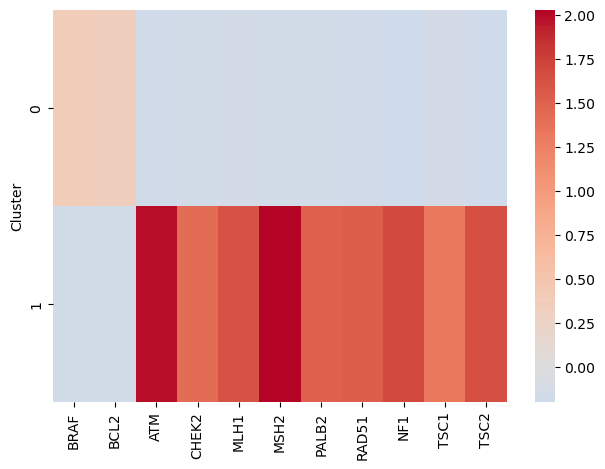

In [14]:
sns.heatmap(centroids_gene_expression, 
            cmap = 'coolwarm',
            center = 0, 
            annot = False)
plt.tight_layout()
plt.show()

Efectivamente, podemos observar cómo el cluster A tiene una ligera mayor expresión en los genes **BRAF** y **BCL2**, mientras que para el cluster B estos genes apenas se expresan. Por el contrario, el resto de los genes no están expresados en el cluster A, mientras que están significativamente expresados en el cluster B.  

# IMPLEMENTACIÓN DEL MODELO CON DIMENSIONALIDAD ORIGINAL

Hemos visto que, al eliminar las variables atendiendo al criterio $VIF \geq 10$, obtenemos dos clusters cuya expresión génica difiere significativamente en los genes conservados. Sin embargo, podemos plantearnos: ¿qué ocurriría si no aplicásemos este criterio para simplificar los datos y trabajamos con los 50 genes? ¿Se vería modificado el resultado? Esto puede ser útil para evaluar la conveniencia del criterio $VIF$. 

En primer lugar, escalamos los datos originales:

In [15]:
X_scaled_full = scaler.fit_transform(X) # escalamos los datos

## Clustering

Visualizamos de nuevo la inercia en función del número de *clusters*:

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is k

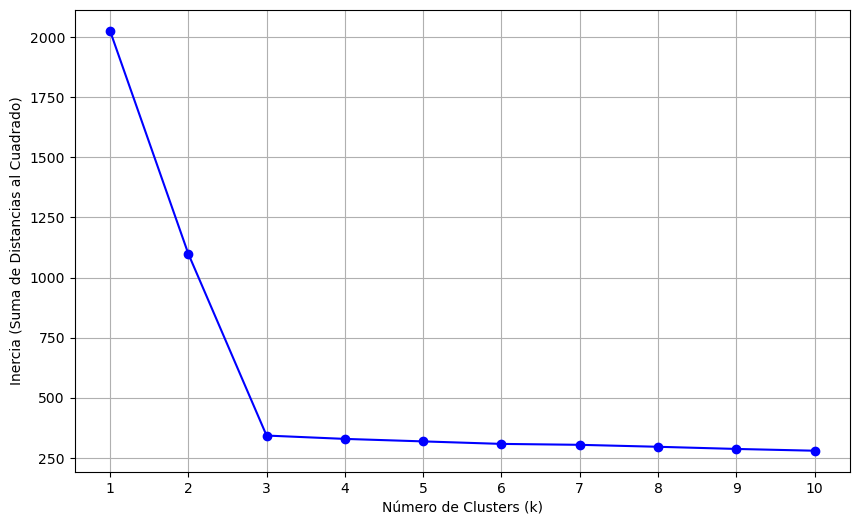

In [16]:
n_clusters_range = range(1, 11) # valores de k para evaluar
inertia_values = [] # inicailiza una lista para guardar los valores de inercia correspondientes a cada valor de k

for k in n_clusters_range:
    kmeans = KMeans(n_clusters = k, n_init = 10) # inicializa el algoritmo
    kmeans.fit(X_scaled_full) # ajusta los datos al modelo
    inertia_values.append(kmeans.inertia_) # guarda el valor de inercia obtenido para el valor de k actual en la lista

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de Distancias al Cuadrado)')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

Como preveíamos, el número óptimo de clusters es 3 y no 2, como en el caso anterior. Siguiendo el mismo esquema de trabajo, podemos extraer los datos de expresión génica para cada uno de los centroides:

In [17]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(X_scaled_full) # ajustar el modelo para 3 clusters
centroids = kmeans.cluster_centers_ # niveles de expresión de los genes para los centroides de cada cluster

centroids_gene_expression = pd.DataFrame(centroids, columns = X.columns)
centroids_gene_expression.index.name = 'Cluster'
centroids_gene_expression.head()

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.095530,-0.109827,-0.075484,-0.049513,-0.104354,-0.090321,-0.088162,-0.075441,-0.112529,-0.071141,...,-0.116787,-0.212959,-0.094335,-0.228480,-0.162230,-0.162362,-0.165793,-0.171059,-0.252300,-0.139167
1,0.717608,0.684239,0.793433,0.801686,0.727800,0.684281,0.765072,0.790219,0.648556,0.773870,...,-0.236287,-0.119652,-0.181469,-0.113653,-0.176508,-0.196980,-0.224538,-0.087468,-0.138310,-0.117341
2,-0.654412,-0.656657,-0.556695,-0.575991,-0.480695,-0.583189,-0.587141,-0.553593,-0.634496,-0.547542,...,1.994141,1.415808,1.618562,2.029416,1.512262,1.530113,1.681573,1.319173,1.633983,1.425951


Y, de nuevo, podemos visualizar las diferencias en la expresión génica entre los grupos utilizando un mapa de calor:

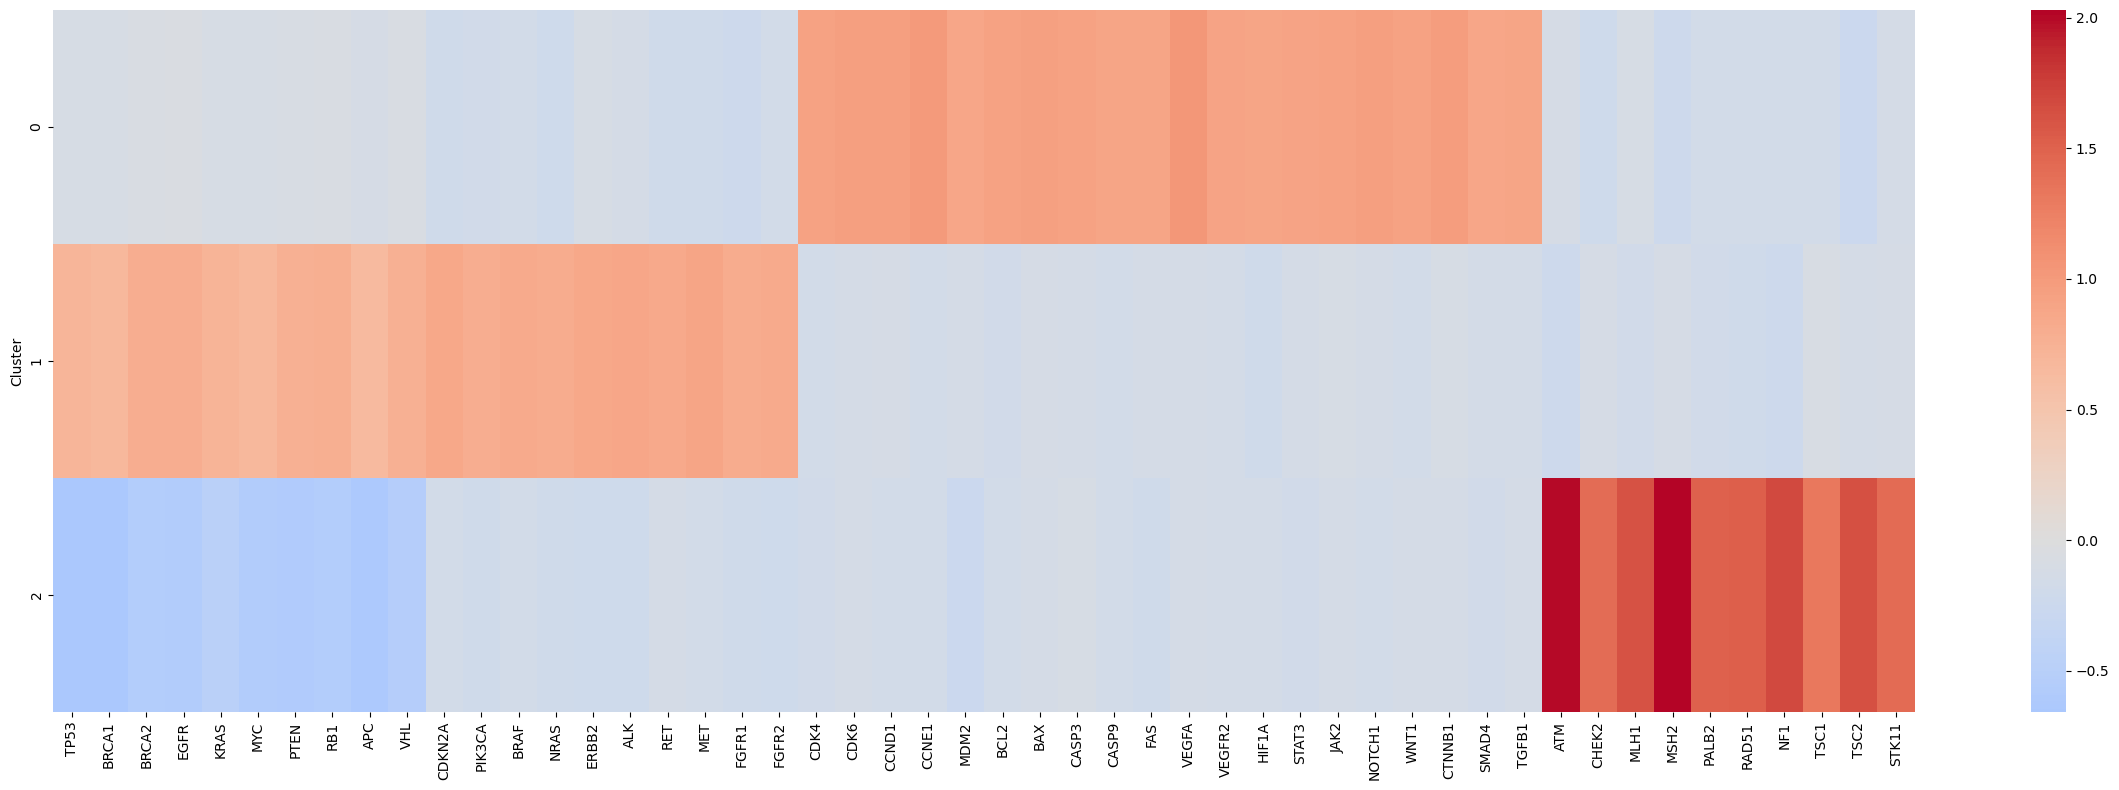

In [18]:
plt.figure(figsize = (24, 8))
sns.heatmap(centroids_gene_expression, 
            cmap = 'coolwarm',
            center = 0, 
            annot = False,
            xticklabels = True)
plt.tight_layout()
plt.show()

Podemos apreciar las diferencias significativas entre los tres clusters: cada uno muestra una mayor expresión en diferentes genes, como se puede ver en las zonas más rojas. En el caso del cluster 1, también se puede apreciar una menor expresión en otro conjunto de genes, como se ve en la zona azul ligeramente oscurecida.

# Conclusión

Se ha llevado a cabo una agrupación de pacientes en función del nivel de expresión génica según el conjunto de datos utilizado.